In [1]:
!pip install tensorflow==2.0.0

In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [3]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
# from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

from tensorflow import keras

Using TensorFlow backend.


## Deep Neural Networks

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


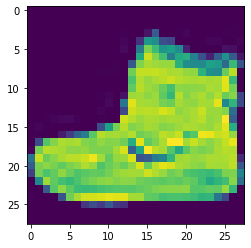

In [5]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
# print(train_labels[0])
# print(train_images[0])

In [0]:
# Neural Network work best when the values are normalized
train_images = train_images/255.0
test_images = test_images/255.0

In [0]:
train_images[0].shape

(28, 28)

In [0]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(128, activation= tf.nn.relu),
                          keras.layers.Dense(10, activation= tf.nn.softmax)
])

In [0]:
model.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs= 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.4958 - accuracy: 0.8256
Epoch 2/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3739 - accuracy: 0.8634
Epoch 3/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3329 - accuracy: 0.8787
Epoch 4/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3124 - accuracy: 0.8851
Epoch 5/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2932 - accuracy: 0.8922


In [0]:
model.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3503857734799385, 0.8778]

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs= {}):
    if(logs.get('loss')<0.4):
      print('\nLoss is low so cancelling training!')
      self.model.stop_training = True

In [0]:
callback = myCallback()
model.fit(train_images, train_labels, epochs= 5,  callbacks = [callback])

Train on 60000 samples
Epoch 1/5
59936/60000 [============================>.] - ETA: 0s - loss: 0.2656 - accuracy: 0.9020
Loss is low so cancelling training!
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2655 - accuracy: 0.9021


## Coding with Convolutions

In [0]:
train_images = train_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)
train_images = train_images/255.0
test_images = test_images/255.0

In [0]:
model = keras.Sequential([
                          keras.layers.Conv2D(32, (3,3), activation= 'relu', input_shape=(28,28,1)), # No.of filters, filter_size, strides = (1,1), padding = 'valid'
                          keras.layers.MaxPooling2D(2,2), # pool_size
                          keras.layers.Conv2D(64, (3,3), activation= 'relu', input_shape=(28,28,1)),
                          keras.layers.MaxPooling2D(2,2),
                          keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(128, activation= tf.nn.relu),
                          keras.layers.Dense(10, activation= tf.nn.softmax)
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [0]:
model.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs= 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 51s 850us/sample - loss: 0.4563 - accuracy: 0.8336
Epoch 2/5
60000/60000 [==============================] - 51s 842us/sample - loss: 0.3103 - accuracy: 0.8856
Epoch 3/5
60000/60000 [==============================] - 51s 843us/sample - loss: 0.2635 - accuracy: 0.9024
Epoch 4/5
60000/60000 [==============================] - 51s 842us/sample - loss: 0.2307 - accuracy: 0.9146
Epoch 5/5
60000/60000 [==============================] - 50s 826us/sample - loss: 0.2030 - accuracy: 0.9247


In [0]:
test_loss = model.evaluate(test_images, test_labels)
test_loss

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.2569337258696556, 0.9067]

In [0]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


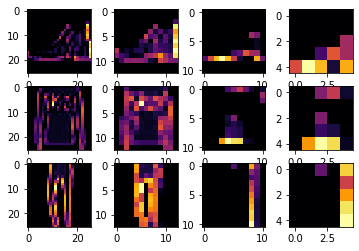

In [0]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=1
THIRD_IMAGE=2
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

How about adding more Convolutions? What impact do you think this will have? Experiment with it.

In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!

# --------------------------------------------------------------------
### Happy or Sad Dataset

Till now we have only worked with 28 x 28 images, what id=f we want to work with larger images. And images where the subject can be in different locations or may be multiple subjects. We worked with the dataset which was divided into test and training split this wont always be the case. We can do this by putting them in a directory according to the split we want and then use the API Image generator to load the data as we want it.

In [1]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 52kB/s 
     |████████████████████████████████| 3.8MB 15.7MB/s 
     |████████████████████████████████| 450kB 38.1MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
# from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

from tensorflow import keras
import tensorflow as tf

In [0]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(rescale = 1./255)
# train_generator = train_datagen.flow_from_directory(
#     train.dir,
#     target_size = (300,300), # This is when you upload the data you change the sizes
#     batch_size = 128,
#     class_mode = 'binary' # Change the classification to binary
# )

# test_datagen = ImageDataGenerator(rescale = 1./255)
# validation_generator = test_datagen.flow_from_directory(
#     validation.dir,
#     target_size = (300,300), 
#     batch_size = 32,
#     class_mode = 'binary' 
# )

In [7]:
import tensorflow as tf
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>DESIRED_ACCURACY):
      print("\nReached desired accuracy of 99.9% so we stop training!")
      self.model.stop_training = True

callbacks = myCallback()

--2020-02-27 16:38:19--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.01s   

2020-02-27 16:38:19 (191 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [0]:
model = tf.keras.models.Sequential([
    
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
    
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation='relu'),
    
# Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
tf.keras.layers.Dense(1, activation='sigmoid')    
   
])

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0

In [0]:
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        '/tmp/h-or-s/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
    
# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
      train_generator, # Batch size also mentioned here
      steps_per_epoch=8,  # There are 1024 images in training, so we divide batch into 8 steps 128 images
      epochs=15,
      verbose=1, # How much animation to show
      # validation_data = validation_generator
      # validation_steps = 8 # It had 256 images and wanted them in batches of 32
      callbacks=[callbacks])

Epoch 1/15
8/8 [==============================] - 2s 292ms/step - loss: 6.9851 - acc: 0.5000
Epoch 2/15
8/8 [==============================] - 2s 273ms/step - loss: 7.6666 - acc: 0.5000
Epoch 3/15
8/8 [==============================] - 2s 271ms/step - loss: 7.6666 - acc: 0.5000
Epoch 4/15
8/8 [==============================] - 2s 271ms/step - loss: 7.6666 - acc: 0.5000
Epoch 5/15
8/8 [==============================] - 2s 276ms/step - loss: 7.6666 - acc: 0.5000
Epoch 6/15
8/8 [==============================] - 2s 279ms/step - loss: 7.6666 - acc: 0.5000
Epoch 7/15
8/8 [==============================] - 2s 275ms/step - loss: 7.6666 - acc: 0.5000
Epoch 8/15
8/8 [==============================] - 2s 277ms/step - loss: 7.6666 - acc: 0.5000
Epoch 9/15
8/8 [==============================] - 2s 276ms/step - loss: 7.6666 - acc: 0.5000
Epoch 10/15
8/8 [==============================] - 2s 275ms/step - loss: 7.6666 - acc: 0.5000
Epoch 11/15
8/8 [==============================] - 2s 280ms/step - lo

In [0]:
image_data = train_datagen.flow_from_directory('/tmp/h-or-s/')

Found 80 images belonging to 2 classes.


In [0]:
for image_batch,label_batch in image_data:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  (32, 256, 256, 3)
Label batch shape:  (32, 2)


In [0]:
import cv2
img = cv2.imread('/tmp/h-or-s/happy/happy2-10.png')
img.shape

(150, 150, 3)

In [0]:
print(os.listdir('/tmp/h-or-s/happy'))

['happy1-05.png', 'happy1-18.png', 'happy1-02.png', 'happy2-03.png', 'happy1-00.png', 'happy2-09.png', 'happy2-10.png', 'happy2-19.png', 'happy2-01.png', 'happy1-07.png', 'happy2-04.png', 'happy2-17.png', 'happy2-00.png', 'happy1-06.png', 'happy2-08.png', 'happy2-11.png', 'happy1-03.png', 'happy1-13.png', 'happy1-17.png', 'happy1-11.png', 'happy2-14.png', 'happy1-01.png', 'happy2-07.png', 'happy2-15.png', 'happy2-02.png', 'happy1-12.png', 'happy1-16.png', 'happy2-18.png', 'happy1-08.png', 'happy1-04.png', 'happy2-13.png', 'happy1-14.png', 'happy1-09.png', 'happy1-10.png', 'happy1-15.png', 'happy2-05.png', 'happy1-19.png', 'happy2-12.png', 'happy2-06.png', 'happy2-16.png']


#---------------------------------------------------------------------
### Horse and Human

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-02-28 12:26:24--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 2a00:1450:4013:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  49.5MB/s    in 2.9s    

2020-02-28 12:26:27 (49.5 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

In [0]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [0]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [6]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse33-0.png', 'horse15-4.png', 'horse31-2.png', 'horse15-8.png', 'horse33-1.png', 'horse18-6.png', 'horse45-7.png', 'horse48-4.png', 'horse36-7.png', 'horse08-6.png']
['human17-18.png', 'human03-19.png', 'human11-29.png', 'human08-21.png', 'human14-20.png', 'human01-13.png', 'human12-27.png', 'human04-04.png', 'human12-12.png', 'human05-13.png']


In [7]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527


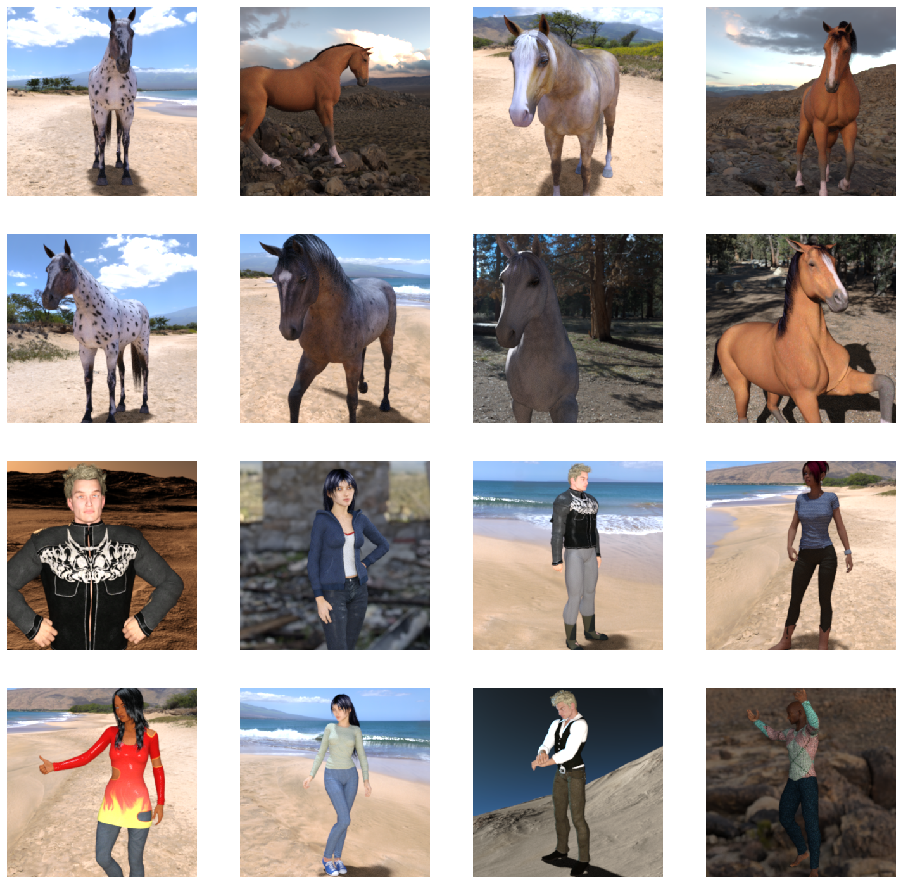

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0



# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [0]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
# # For image compression

# model = tf.keras.models.Sequential([
#     # Note the input shape is the desired size of the image 150x150 with 3 bytes color
#     # This is the first convolution
#     tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     # The second convolution
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The third convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The fourth convolution
#     #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     #tf.keras.layers.MaxPooling2D(2,2),
#     # The fifth convolution
#     #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     #tf.keras.layers.MaxPooling2D(2,2),
#     # Flatten the results to feed into a DNN
#     tf.keras.layers.Flatten(),
#     # 512 neuron hidden layer
#     tf.keras.layers.Dense(512, activation='relu'),
#     # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [0]:
# For Image compression

# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # All images will be rescaled by 1./255
# train_datagen = ImageDataGenerator(rescale=1/255)
# validation_datagen = ImageDataGenerator(rescale=1/255)

# # Flow training images in batches of 128 using train_datagen generator
# train_generator = train_datagen.flow_from_directory(
#         '/tmp/horse-or-human/',  # This is the source directory for training images
#         target_size=(150, 150),  # All images will be resized to 150x150
#         batch_size=128,
#         # Since we use binary_crossentropy loss, we need binary labels
#         class_mode='binary')

# # Flow training images in batches of 128 using train_datagen generator
# validation_generator = validation_datagen.flow_from_directory(
#         '/tmp/validation-horse-or-human/',  # This is the source directory for training images
#         target_size=(150, 150),  # All images will be resized to 150x150
#         batch_size=32,
#         # Since we use binary_crossentropy loss, we need binary labels
#         class_mode='binary')

In [14]:
# history = model.fit_generator(
#       train_generator,
#       steps_per_epoch=8,  
#       epochs=15,
#       verbose=1)

history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 79s 10s/step - loss: 0.7906 - acc: 0.5795
Epoch 2/15
8/8 [==============================] - 78s 10s/step - loss: 1.4335 - acc: 0.7119
Epoch 3/15
8/8 [==============================] - 78s 10s/step - loss: 0.4156 - acc: 0.8331
Epoch 4/15
8/8 [==============================] - 77s 10s/step - loss: 0.2366 - acc: 0.8932
Epoch 5/15
8/8 [==============================] - 86s 11s/step - loss: 0.2374 - acc: 0.9004
Epoch 6/15
8/8 [==============================] - 78s 10s/step - loss: 0.1317 - acc: 0.9600
Epoch 7/15
8/8 [==============================] - 79s 10s/step - loss: 0.6297 - acc: 0.8309
Epoch 8/15
8/8 [==============================] - 79s 10s/step - loss: 0.2355 - acc: 0.9355
Epoch 9/15
8/8 [==============================] - 78s 10s/step - loss: 0.1242 - acc: 0.9511
Epoch 10/15
8/8 [==============================] - 72s 9s/step - loss: 0.0844 - acc: 0.9722
Epoch 11/15
8/8 [==============================] - 76s 10s/step - loss: 0.0392 -

In [0]:
import numpy as np
import time
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
  # time.sleep(10)

Saving horse01-6.png to horse01-6 (1).png
Saving horse01-7.png to horse01-7 (1).png
Saving horse01-8.png to horse01-8 (1).png
Saving horse01-9.png to horse01-9 (1).png
[0.]
[0.]
[0.]
[0.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


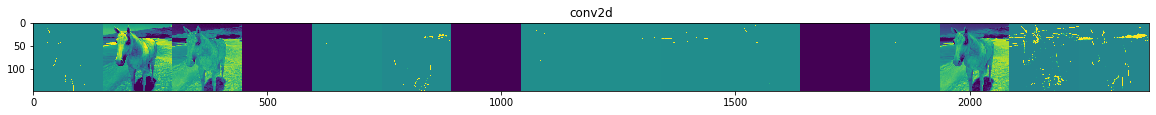

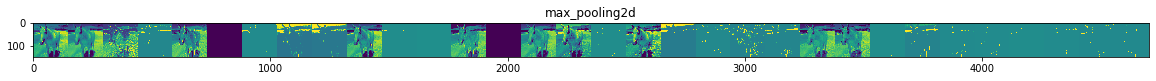

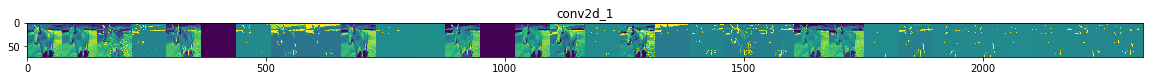

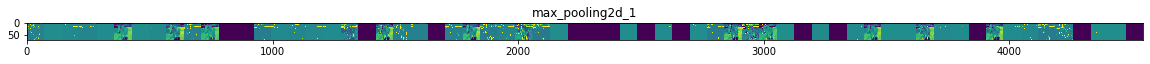

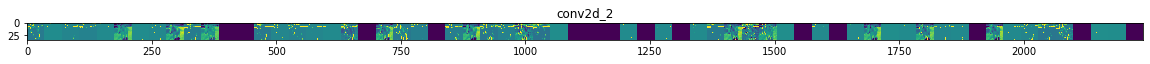

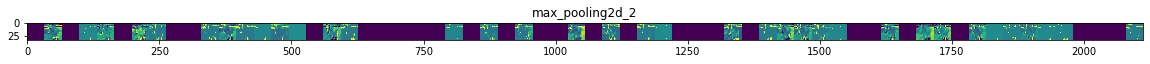

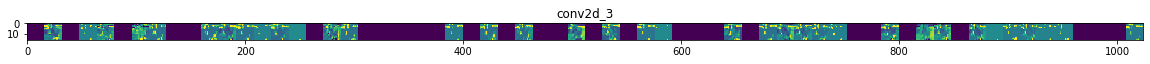

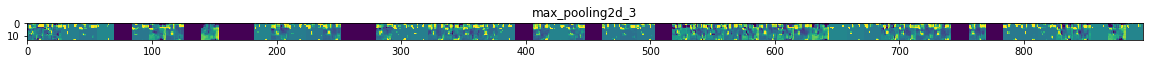

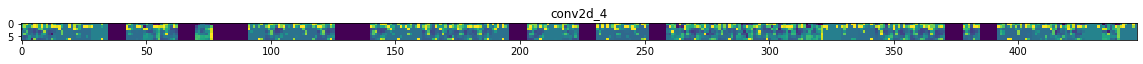

In [15]:

import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')